# Cluster analysis of European countries by number of smokers

# Authors
Adam Dohojda, Kacper Kiereś, Dawid Koceniak, Wiktoria Stęczna

# Abstract
In this project, we perform a cluster analysis of European countries in terms of citizens' smoking habits. We want to identify which countries have similar statistical properties in terms of smoking habits, dividing them into clusters.
In this work, we focused on selection, visualising the collected variables on smoking prevalence in European countries, describing them with descriptive statistics, standardising them and subjecting them to clustering procedures using models from the sci-kit learn library of the Python language. The quality of the divisions was then assessed using a visual method, as well as a series of measures describing the quality of the clustering, to finally select the most effective method for dividing European countries into clusters with similar tobacco consumption habits within the clusters. The chosen division was made using an optimal clustering method as well as an appropriate number of clusters. Finally, we attempt to interpret the results to assess the substantive composition of the clusters.

# Keywords
- clustering
- burning
- choice of methods
- smoking habits
- object division

# Introduction
Cigarette smoking, or nicotinism, is a physical addiction as well as a psychological one, and as such is described in detail in the International Classification of Diseases and Health Problems ICD 10.

The smoking epidemic is one of the largest public health threats worldwide, killing more than 8 million people each year. More than 7 million of these deaths are the result of direct tobacco use, while approximately 1.3 million are the result of exposure of non-smokers to so-called passive smoking.

All forms of smoking are harmful and there is no safe level of exposure to tobacco. Cigarette smoking is the most prevalent form of tobacco use worldwide and it is this problem that we have chosen to investigate in our work.

# Subject of the study

The subject of this study is a comprehensive analysis of smoking habits among European countries, using a cluster analysis method. We will attempt to identify similarities and differences in smoking patterns between different countries, allowing for the identification of clusters with similar smoking characteristics. The study includes a range of visualisations, from density plots of each variable to plots of the clusters themselves in different variants.

## Purpose and scope of the study 

The aim of this study is to understand the variation in smoking habits among European countries through the use of cluster analysis. Methods used in the study include the k-means method, hierarchical clustering or Gaussian Mixture.

The countries selected for analysis are:Belgium, Bulgaria, Czech Republic, Denmark, Germany, Estonia, Ireland, Greece, Spain, France, Croatia, Italy, Cyprus, Latvia, Lithuania, Luxembourg, Hungary, Malta, Netherlands, Austria, Poland, Portugal, Romania, Slovenia, Slovakia, Finland, Sweden, Iceland, Norway, European Union, Serbia, Turkey. The data analysed is from 2019.

In order to identify the best method of dividing objects into clusters, 3 indices were used(Calinski-Harabsz Index, Davies-Bouldin Index, Silhouette Coefficient) calculated for each of the selected methods and a varied number of clusters(from 2 to 10).

## Literature review

The topic of the smoking problem in Europe was addressed in the 2020 paper ,,Smoking epidemic in Europe in the 21st century" by authors F. Janssen, S. El Gewily, A. Bardoutsos. The researchers, on the basis of a previous, similar study, decided to calculate , "smoking-attributable mortality fractions" - SAMF, or smoking attributable mortality fractions, and project them to the year 2100. The fractions were counted for 29 European countries by gender - the men surveyed were aged 35-84 years and the women aged 40-84 years.

The authors used the Peto-Lopez method for the study, which uses national lung cancer mortality rates adjusted for the non-smoking portion. The method also assumes that the rate is also adjusted for smokers' exposure to other environmental factors.Finally, a SAMF for each year of life is obtained, e.g. for age 50, for age 51. The authors obtained the cumulative SAMF for each calendar year for nationals using death distributions for specific populations from the mortality database from the University of California, Berkeley.

In 2014, Hungary(40.65) for men and Denmark(26.98) for women had the highest mortality rate in Europe as defined in the study. In addition, the top highest mortality rates for men were: Spain, Poland, Slovakia, Slovenia and Russia. For women these were: Iceland, Ireland, the Netherlands, the United Kingdom.

## Variables selected for analysis

$X_1$ - percentage of smokers in the country [%]\
$X_2$ - percentage of smokers smoking less than 20 cigarettes per day [%]\
$X_3$ - percentage of smokers smoking more than 20 cigarettes per day [%]\
$X_4$ - percentage of smokers residing in urban metropolitan areas [%]\
$X_5$ - percentage of smokers residing in small city areas [%]\
$X_6$ - percentage of smokers residing in rural areas [%]\
$X_7$ - percentage of male smokers [%]\
$X_8$ - percentage of female smokers [%]\
$X_9$ - percentage of smokers in the age range 15 - 19 [%]\
$X_{10}$ - percentage of smokers in the age bracket 15 - 24 [%]\
$X_{11}$ - percentage of smokers in the age range 15 - 29 years [%]\
$X_{12}$ - percentage of smokers in the age range 15 - 64 years [%]\
$X_{13}$ - percentage of smokers in the age range 18 - 24 years [%]\
$X_{14}$ - percentage of smokers with at least 18 years of age. [%]\
$X_{15}$ - percentage of smokers in the age range 20 - 24 years [%]\
$X_{16}$ - percentage of smokers in the age bracket 25 - 29 years [%]\
$X_{17}$ - percentage of smokers in the age bracket 25 - 34 years [%]\
$X_{18}$ - percentage of smokers in the age range 35 - 44 years [%]\
$X_{19}$ - percentage of smokers in the age bracket 45 - 54 years [%]\
$X_{20}$ - percentage of smokers in the age bracket 45 - 64 years [%]\
$X_{21}$ - percentage of smokers in the age range 55 - 64 years [%]\
$X_{22}$ - percentage of smokers in the age range 65 - 74 [%]\
$X_{23}$ - percentage of smokers with at least 65 years of age [%]\
$X_{24}$ - percentage of smokers with at least 75 years of age [%]\

The selected variables comprehensively and multidimensionally treat the problem of smoking in the countries studied. The selected shares represent smoking habits among the diverse demographics of European countries. Such a broad set of variables makes it possible to model the smoking habits of a country's citizens as a whole.

## Preliminary data analysis

In [1]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning) #turn off warnings

import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import numpy as np
import seaborn as sns
from scipy.stats import skew, kurtosis, bootstrap
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

Loading data into the DataFrame

In [2]:
df = pd.read_excel('Data.xlsx').set_index('Country')

### Handling data gaps

In which variables do we observe value gaps?

In [3]:
np.sum(np.isnan(df), axis=0)

X1     0
X2     0
X3     0
X4     2
X5     2
X6     2
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
dtype: int64

We see missing values in $X_4$, $X_5$, $X_6$.

In which countries are there data gaps?

In [4]:
np.sum(np.isnan(df), axis=1)[np.sum(np.isnan(df), axis=1) > 0]

Country
Serbia     3
Türkiye    3
dtype: int64

Missing data occur for Turkey and Serbia. Supplementing these data with zeros may not be appropriate, for substantive reasons (in these countries we expect these variables to have taken much larger values).

**Filling in missing data**

To fill in the gaps, we will use an object of class [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) from the sci-kit learn package. The values of the hyperparameters will be set by default (number of neighbours = 5, Euclidean distance).

In [5]:
imputer = KNNImputer()
new_df = pd.DataFrame(imputer.fit_transform(df), columns=imputer.get_feature_names_out(), index=df.index)


### Visualisation of the variables, together with their estimated densities

In this step, we visualise all the variables, aiming to obtain density histograms (so the vertical axis represents frequencies, instead of the number of values of a variable occurring). Additionally, for a deeper understanding, we used the [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) method from the SeaBorn package to plot the estimated density curve. You can read more about the implemented method [here](https://en.wikipedia.org/wiki/Kernel_density_estimation).

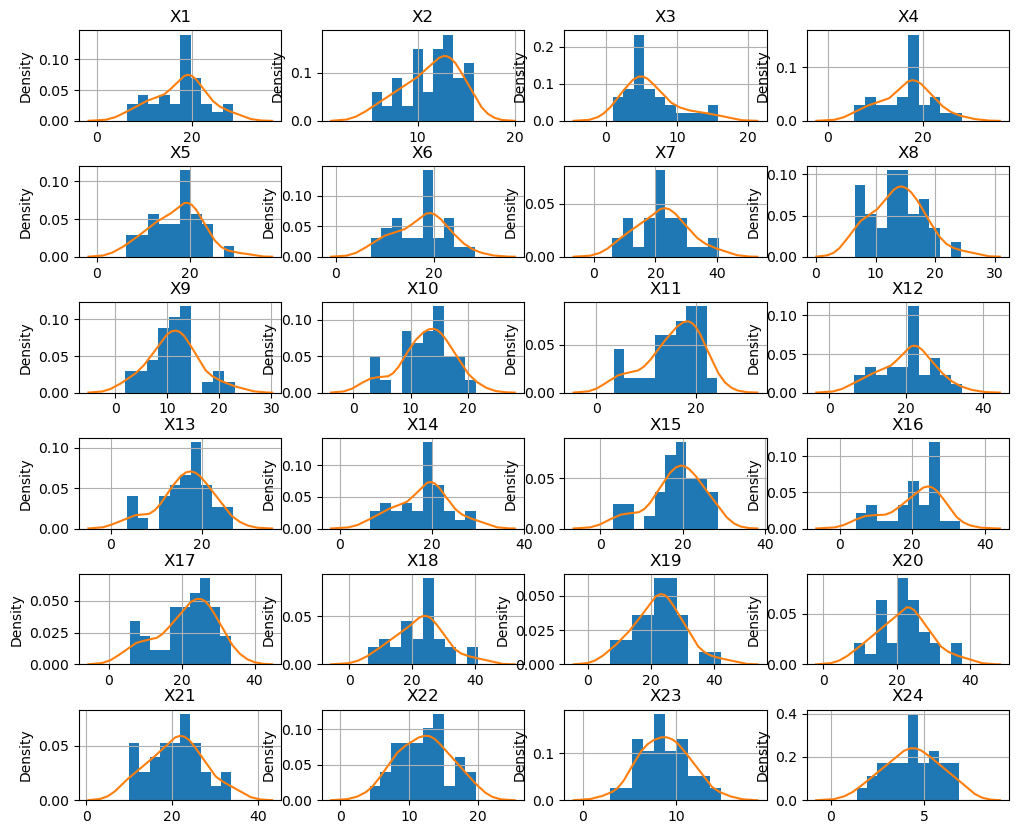

In [6]:
plt.style.use('fast')
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(12,10))
plt.subplots_adjust(hspace=0.5)
for ax, col in zip(axs.flat, df.columns):
    ax.hist(df[col], bins=10, density=True)
    sns.kdeplot(df[col], ax=ax)
    ax.grid(True)
    ax.set_title(col)
    ax.set_xlabel('')

From the graphs, we can see the apparent unimodality of the distributions, the relative symmetry and the differences in the observed flattening of the curve. We will further verify the last two observations later in the paper.

### Descriptive statistics

In this section we will count and interpret the descriptive statistics of our dataset. To the basic statistics calculated by the Pandas package, we have added calculated [skewness](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html#scipy.stats.skew) and [kurtosis](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html).

In [7]:
skewnesses = skew(new_df, axis=0)
kurtosises = kurtosis(new_df, axis=0)
stats = pd.concat([new_df.describe(), pd.DataFrame({'skewness':skewnesses, 'kurtosis':kurtosises}, index=new_df.columns).T]).T
stats['coef_of_var'] = stats['std'] / stats['mean']
stats

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis,coef_of_var
X1,32.0,17.671875,5.471052,6.4,14.400,18.55,20.600,28.7,-0.181180,-0.376567,0.309591
X2,32.0,11.371875,2.807505,5.3,9.775,11.95,13.350,15.8,-0.537643,-0.600688,0.246881
X3,32.0,6.321875,3.664189,1.0,4.075,5.40,7.900,15.8,1.009990,0.445025,0.579605
X4,32.0,17.065625,5.375188,5.6,14.250,17.70,20.650,28.3,-0.291134,-0.385678,0.314972
X5,32.0,17.533125,5.453888,6.3,13.400,18.45,21.125,29.6,-0.204242,-0.382600,0.311062
X6,32.0,17.613750,5.335404,7.1,13.300,18.65,21.425,28.3,-0.295805,-0.666051,0.302911
X7,32.0,22.078125,8.239274,5.9,16.400,22.65,26.650,40.6,0.131496,-0.324088,0.373187
X8,32.0,13.665625,4.312144,6.5,11.225,13.85,16.500,24.4,0.191824,-0.259796,0.315547
X9,32.0,11.350000,4.700309,1.9,8.450,10.75,13.875,23.1,0.211525,0.215907,0.414124
X10,32.0,12.681250,4.506228,2.9,10.175,13.20,15.725,21.4,-0.516804,-0.003552,0.355346


From these results, we can see statistics such as mean, individual quartiles, minimum and maximum values.

It is worth noting that the smallest average percentage of smokers is found among those aged over 75 and among those smoking more than 20 cigarettes a day, while the highest average percentage of smokers is found among those aged 45-54.

The coefficient of variation for each of the variables varies around 0.3. The smallest deviation from the mean is found for variable $X_2$ (percentage of smokers smoking less than 20 cigarettes per day) and the largest for variable $X_3$ (percentage of smokers smoking more than 20 cigarettes per day).

For the ten variables:
- $X_3$ (Percentage smoking more than 20 cigarettes per day),
- $X_7$ (Percentage of male smokers),
- $X_8$ (Percentage of female smokers),
- $X_9$ (Percentage of smokers in the 15-19 age bracket),
- $X_{18}$ (Percentage of smokers in the 35-44 age bracket),
- $X_{19}$ (Percentage of smokers in the 45-54 age bracket),
- $X_{20}$ (Percentage of smokers in the 45-64 age bracket),
- $X_{21}$ (Percentage of smokers in the 55-64 age bracket),
- $X_{22}$ (Percentage of smokers in the 65-74 age bracket),
- $X_{23}$ (Percentage of smokers with at least 65 years of age),

the asymmetry coefficient (skewness) is greater than zero. This indicates right-sided asymmetry in the distribution of the characteristics under study, in other words, we can say that most countries for a given variable have a percentage of smokers smaller than the average value. For the other variables, we have the opposite situation (the distribution of the studied characteristics has left-hand asymmetry).For the variables:- $X_3$ (Percentage smoking more than 20 cigarettes per day),- $X_9$ (Percentage of smokers in the 15-19 age range),- $X_{13}$ (Percentage of smokers in the 18-24 age range),- $X_{15}$ (Percentage of smokers in the 20-24 age bracket),- $X_{19}$ (Percentage of smokers in the 45-54 age range),


the kurtosis index came out greater than zero, which means that the distributions of the above-mentioned characteristics are leptokurtic distributions - a significant proportion of the results are similar to each other, and there are few observations that are significantly different from the mean. For the other variables, kurtosis is negative, which means that the distributions of the subjects are platykurtic distributions - we can observe a greater number of extreme results (significantly far from the mean) in the data.


In the following, we will focus more attention on kurtosis itself and skewness for the studied characteristics.


**Verification of skewness and kurtosis of distributions of variables**.

The calculated statistics for skewness and kurtosis are estimates of parameters from the population, with such a small size of each sample (n=32) additionally subject to significant error. To get at least a general idea of the shape of these distributions, we will use confidence intervals (for both kurtosis and skewness) constructed using the non-parametric Bootstrap method. A modified Bootstrap method will be used, which will use second-order modified confidence intervals obtained using the BCa (Bias-Corrected and Accelerated) method. It differs from the first-order method in that it uses a measure other than the percentile to determine the intervals and takes into account the skewness of the resampling and tries to estimate the parameter for the actual population rather than these samples. More about this method [in this article](https://www.tandfonline.com/doi/abs/10.1080/01621459.1987.10478409).

In [8]:
def skew_statistic(data):
    return skew(data, axis=0)

def kurtosis_statistic(data):
    return kurtosis(data, axis=0)

data = (new_df.values[i] for i in range(new_df.shape[1]))
def bootstrap_for_xses(df, statistic, n_resamples=1000):
    skewness_mean = np.zeros(df.shape[1])
    kurtosis_mean = np.zeros(df.shape[1])
    skewness_intervals = np.zeros((df.shape[1], 2))
    kurtosis_intervals = np.zeros((df.shape[1], 2))
    for column in range(df.shape[1]):
        data = (df.values[column],)
        skewness_bootstrap = bootstrap(data=data, statistic=skew_statistic, n_resamples=n_resamples, confidence_level=.9)
        kurtosis_bootstrap = bootstrap(data=data, statistic=kurtosis_statistic, n_resamples=n_resamples, confidence_level=.9)
        skewness_mean[column] = np.mean(skewness_bootstrap.bootstrap_distribution)
        kurtosis_mean[column] = np.mean(kurtosis_bootstrap.bootstrap_distribution)
        skewness_intervals[column, :] = np.array(tuple(skewness_bootstrap.confidence_interval))
        kurtosis_intervals[column, :] = np.array(tuple(kurtosis_bootstrap.confidence_interval))

    return skewness_mean, kurtosis_mean, skewness_intervals, kurtosis_intervals



s, k, s_i, k_i = bootstrap_for_xses(new_df, skew_statistic, n_resamples=5000)

We count the constructed intervals for each variable, using 5000 resamples. As each variable has 32 values, the possible number of all combinations of draws with return is about (for non-repeating values) $32^{32}$. This is therefore not a lot of sampling, and in the Bootstrap method it is not so much this parameter that is most important in narrowing the ranges, but the sample size, which in our case is limited by the number of countries in the survey (and also present in Europe). We decided to compromise on the confidence level, which, in order to obtain not too wide ranges but still high confidence, we set in both cases at 90%.

We will then build a function that, for the calculated mean levels of the counted statistics and confidence intervals, will draw a graph, where the vertical line is the range of the interval that covers the sought parameter with a probability of 90%, and the point denotes the Bootstrap-estimated value of the sought statistic.

In [9]:
def plot_statistic(statistic, confidence_intervals, name='statystyki', conf_level=.9):
    fig, ax = plt.subplots(figsize=(10,8))
    for i in range(statistic.shape[0]):
        plt.vlines(i, confidence_intervals[i,0], confidence_intervals[i,1], color='gray', zorder=0)
    ax.scatter(np.arange(statistic.shape[0]), statistic, color='black', zorder=1)
    plt.grid(False)
    plt.axhline(0, linestyle='--', alpha=0.5)
    ax.set_xticks(np.arange(statistic.shape[0]), labels=[f"X_{j}" for j in range(1, statistic.shape[0]+1)], rotation=45)
    ax.set_ylabel(name)
    plt.title(f"Średnia {name}, wraz z przedziałem ufności na poziomie ufności {conf_level}")




The adopted concepcion assumes that skewness equal to 0 denotes the skewness of a normal (symmetric) distribution, where values less than 0 denote a left-symmetric distribution and greater than 0 denote a right-symmetric distribution. For kurtosis, we used Fisher's definition - kurtosis equal to 0 is the flattening of the distribution characteristic of a normal distribution, greater than 0 indicates a leptokurtic distribution and less than 0 a platykurtic distribution.

**Chart for skewness**

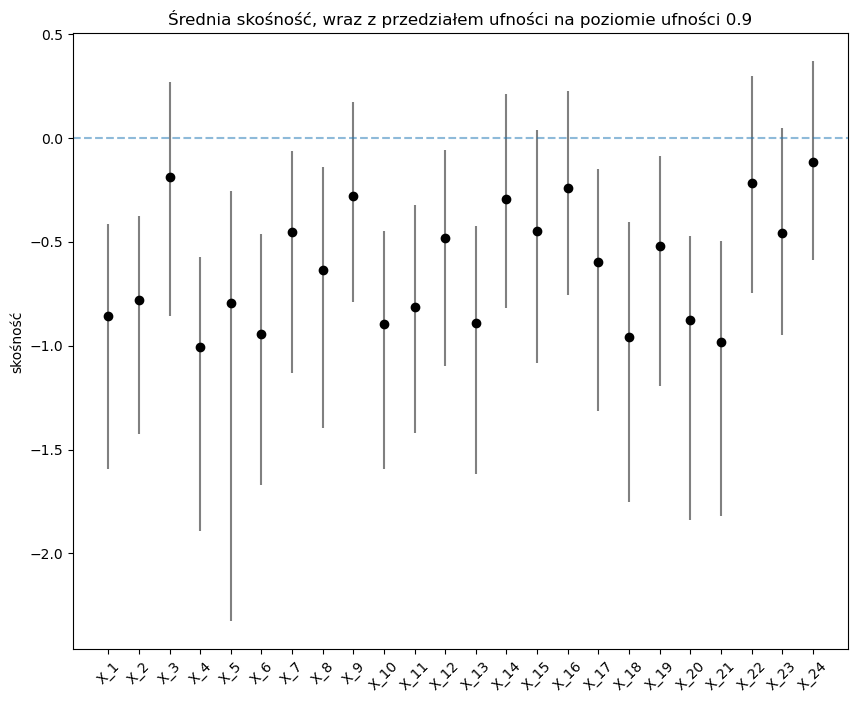

In [10]:
plot_statistic(s, s_i, name="skośność")

**Chart for kurtosis**

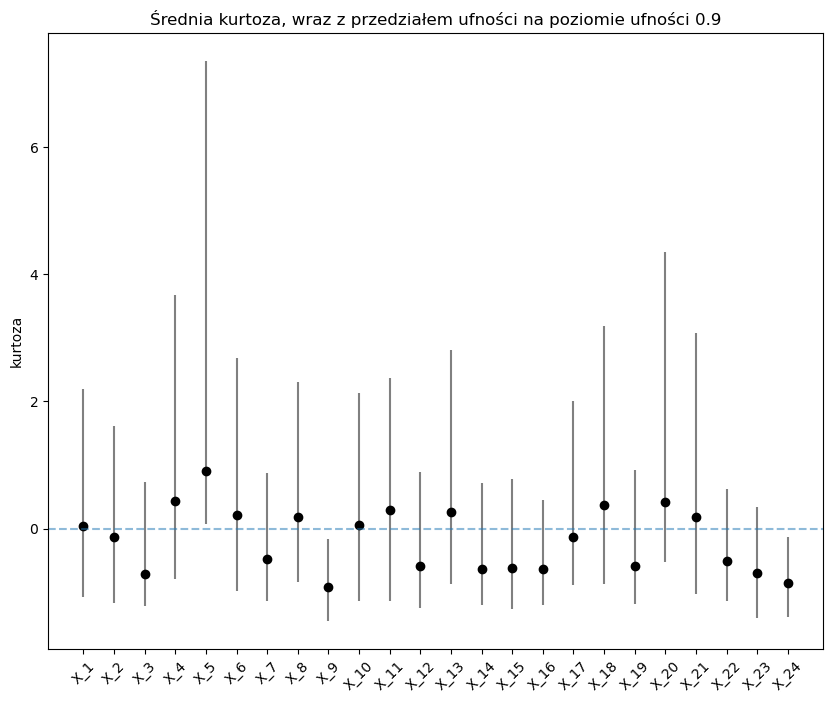

In [11]:
plot_statistic(k, k_i, name="kurtoza")

Due to the very small size of each sample (n=32), the estimates obtained with Bootstrap are not very reliable, but show that the data are often not significantly different from a normal distribution (frequent overlap between kurtosis values and skewness equal to 0).

# Description of methods

### Standardisation of variables

In this step, we will perform a standardisation of the variables to prepare for the cluster analysis. We will standardise the variables so that the scale of a feature does not affect its contribution to the cluster. The standardisation will be performed using an object of class [sklearn.preprocessing.Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler), which applies the formula:

$$X_i^* = \frac{X_i - E(X_i)}{\sqrt{D^2(X_i)}}$$

In [12]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(new_df)

In [13]:
scaled_df = pd.DataFrame(scaled_df, index=new_df.index, columns=new_df.columns)
final_df = scaled_df.copy()

### Dimensional reduction

We will also prepare the data using the Prinicipal Component Analysis algorithm for display on a two-dimensional plane to better observe the effects of clustering. As this is not the topic of our work, more information about this method can be found [here](https://en.wikipedia.org/wiki/Principal_component_analysis). Our project used an implementation of this algorithm in the form of an object of the class [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), where the number of components was set (for visualisation purposes) to 2, and [decomposition by singular vectors](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych) was performed using the LAPACK method (a method whose roots are in the Fortran language).

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
dim_reduced_df = pca.fit_transform(final_df)

### Displaying results

Below, we have prepared a function which is widely used in the presentation of results:
    - in the absence of breakdowns (no "predictions" of cluster membership provided), it does not display a title and does not give distinctive colours to the points
    - in the case of supplied predictions, it gives a title explaining which method was used, for how many clusters, and finally colours the points according to their cluster membership.

In [15]:
def plot_results(df_dim_2, title='', cluster_preds=np.array([])):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
    plt.style.use('dark_background')
    if cluster_preds.size:
        ax.set_title(f"Podział obiektów według metody {title}, liczba klastrów = {np.unique(cluster_preds).shape[0]}")
        ax.scatter(dim_reduced_df[:, 0], dim_reduced_df[:, 1], c=cluster_preds, cmap='cool')
    else:
        ax.scatter(dim_reduced_df[:, 0], dim_reduced_df[:, 1])
    for num, country in enumerate(final_df.index):
        plt.text(dim_reduced_df[num, 0], dim_reduced_df[num,1], country)

Below are the results of dimension reduction using the PCA method on our dataset:

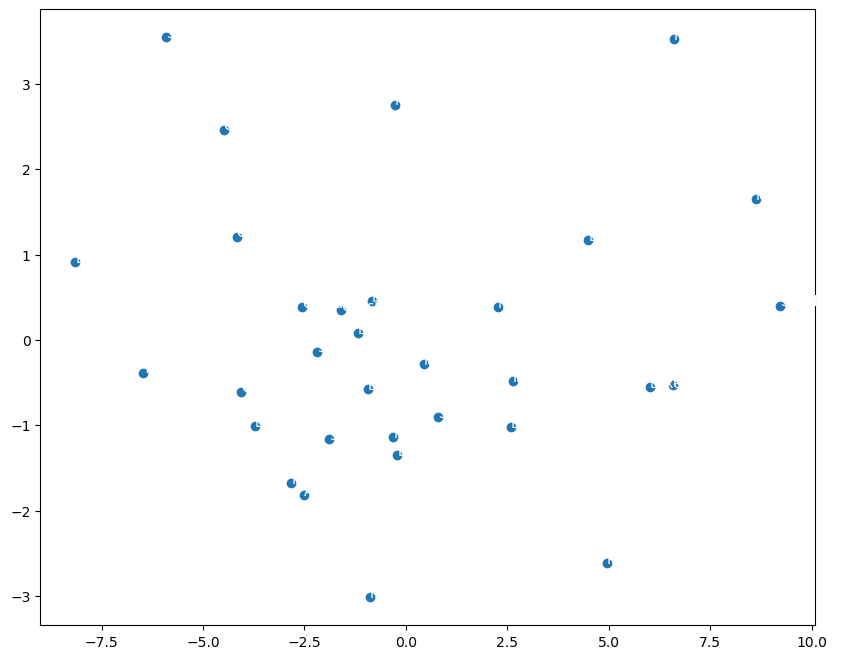

In [16]:
plot_results(dim_reduced_df)

**Implementation of example clustering models.**

In this section we will show the application of a few selected algorithms from the [sklearn.cluster](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) library on our data.

In [17]:
import sklearn.cluster as cl
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

### Measures of clustering quality

Faced with such a plethora of methods and such a large number of combinations of hyperparameters, we had to use objective measures of clustering quality. We took advantage of those available in the [sklearn.metrics] package(https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). \

These are:
1. Silhouette Coefficient - a measure of clustering quality that measures the fit of objects to their clusters and their distance to other clusters. You can read more about this measure [on the Wikipedia article](https://en.wikipedia.org/wiki/Silhouette_(clustering)) or [at the source](https://www.sciencedirect.com/science/article/pii/0377042787901257). The coefficient takes values in the range $[-1, 1]$, where the higher the coefficient, the better the clustering quality.
2. Calinski-Harabasz Index - a measure of clustering quality that measures the separability of clusters. It is determined as the ratio of the sum of inter-cluster variance to the sum of intra-cluster variance. It takes values in the range $[0, +\infty)$, where higher values indicate that the clusters are more dense and better separated from each other. More on this method in [article](https://www.tandfonline.com/doi/abs/10.1080/03610927408827101)
3. the Davies-Bouldin Index - a measure of clustering quality that measures the similarity of clusters. It is determined as the average value of the Davies-Bouldin Index for all clusters. It takes values in the range $[0, +\infty)$, the higher the value of the measure, the lower the similarity of the clusters. For more details, see this [article](https://ieeexplore.ieee.org/document/4766909)

### Function for clustering

We have prepared a function whose operation is the basis of our analysis. We can select plot mode (plot=True), where the clustering method will be applied to the data, the clustering quality measures will be plotted (but not returned) and a dot plot using the *plot_results* function will be made. For a plot flag with a value of False, the values of the measures listed in the previous section for the method will simply be returned.

In [18]:
def fit_and_show(model, name='', plot=True):
    results = model.fit_predict(final_df)
    if plot:
        plot_results(final_df, name, results)
        print(f"Silhouette Coef: {silhouette_score(final_df, results)}")
        print(f"Calinski-Harabasz Index: {calinski_harabasz_score(final_df, results)}")
        print(f"Davies-Bouldin Index: {davies_bouldin_score(final_df, results)}")
        return
    return silhouette_score(final_df, results), calinski_harabasz_score(final_df, results), davies_bouldin_score(final_df, results)

## Selection of the best caging method and the appropriate number of clusters.

In the previous section we saw the operation of example clustering models on our dataset. In this section, using the three indexes (introduced earlier), we will select the best method from the majority available in the *sklearn.cluster* package. We will also select the appropriate hyperparameters for the number of clusters. The selection will be based on the three indices mentioned earlier.

### Methods used

The algorithms used are most of those available within the [sklearn.cluster](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) package and the [sklearn.mixture.GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture) method.

List with a shorter description of the methods:
- [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) - A hierarchical method that clusters objects based on their distance. Different distance metrics can be used. In our case we will use Ward's method.
- [Birch](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html) - A hierarchical method that uses a decision tree to create clusters.
- [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) - a non-hierarchical method that assigns objects to clusters based on their distance from their nearest cluster centre (known as the centroid).
- [BisectingKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.BisectingKMeans.html) - An extension of the KMeans method that divides collections into clusters in an iterative manner.
- [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html) - a version of the KMeans method that uses mini-batches of data to calculate cluster centres, it is faster than the classic method but less accurate.
- [SpectralClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html) - a technique with its roots in graph theory, in which this approach is used to identify the community of nodes in a graph based on the edges connecting them.
- [GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) - A probabilistic method which assumes that the data are derived from a mixture of Gaussian distributions.

Below is a list of imported models:

In [19]:
import sklearn.cluster as cl
from sklearn.mixture import GaussianMixture

In [20]:
models = [cl.AgglomerativeClustering, cl.Birch, cl.KMeans, cl.BisectingKMeans, cl.MiniBatchKMeans, cl.SpectralClustering, GaussianMixture]

We will prepare a multindex so that we can record the values of the three indices for each method.

In [44]:
import itertools
index = [np.array(list(itertools.chain.from_iterable([[model_name.__name__]*3 for model_name in models]))), np.array(['Silhouette Coef', 'Calinski-Harabasz Index', 'Davies-Bouldin Index'] * len(models))]
results = pd.DataFrame(np.zeros((index[0].shape[0], 9)), index=index, columns=np.arange(2, 11)) #inicjujemy pusty DataFrame na wyniki

print(index)

[array(['AgglomerativeClustering', 'AgglomerativeClustering',
       'AgglomerativeClustering', 'Birch', 'Birch', 'Birch', 'KMeans',
       'KMeans', 'KMeans', 'BisectingKMeans', 'BisectingKMeans',
       'BisectingKMeans', 'MiniBatchKMeans', 'MiniBatchKMeans',
       'MiniBatchKMeans', 'SpectralClustering', 'SpectralClustering',
       'SpectralClustering', 'GaussianMixture', 'GaussianMixture',
       'GaussianMixture'], dtype='<U23'), array(['Silhouette Coef', 'Calinski-Harabasz Index',
       'Davies-Bouldin Index', 'Silhouette Coef',
       'Calinski-Harabasz Index', 'Davies-Bouldin Index',
       'Silhouette Coef', 'Calinski-Harabasz Index',
       'Davies-Bouldin Index', 'Silhouette Coef',
       'Calinski-Harabasz Index', 'Davies-Bouldin Index',
       'Silhouette Coef', 'Calinski-Harabasz Index',
       'Davies-Bouldin Index', 'Silhouette Coef',
       'Calinski-Harabasz Index', 'Davies-Bouldin Index',
       'Silhouette Coef', 'Calinski-Harabasz Index',
       'Davies-Bouldin 

We count the measure values for all methods, with different numbers of clusters (from 2 to 11).

In [22]:
for num_clasters in range(2, 11):
    for model in models:
        try:
            sc, chi, dbi = fit_and_show(model(n_clusters=num_clasters), plot=False)
        except Exception as e:
            sc, chi, dbi = fit_and_show(model(n_components=num_clasters), plot=False)
        results.loc[(model.__name__, 'Silhouette Coef'), num_clasters] = sc
        results.loc[(model.__name__, 'Calinski-Harabasz Index'), num_clasters] = chi
        results.loc[(model.__name__, 'Davies-Bouldin Index'), num_clasters] = dbi



c:\Users\Dawid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\Dawid\anaconda3\Lib\site-packages\sklearn\cluster\_bisect_k_means.py:245: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Dawid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
c:\Users\Dawid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Dawid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: U

# Results

The DataFrame below shows, for each clustering method used, the calculated three previously mentioned clustering quality measures, along with the changing number of clusters:

In [23]:
results

2          3   \
AgglomerativeClustering Silhouette Coef           0.467550   0.360764   
                        Calinski-Harabasz Index  32.295371  30.567517   
                        Davies-Bouldin Index      0.699866   0.872827   
Birch                   Silhouette Coef           0.467550   0.360764   
                        Calinski-Harabasz Index  32.295371  30.567517   
                        Davies-Bouldin Index      0.699866   0.872827   
KMeans                  Silhouette Coef           0.453253   0.359326   
                        Calinski-Harabasz Index  37.242326  31.000626   
                        Davies-Bouldin Index      0.782450   0.933822   
BisectingKMeans         Silhouette Coef           0.453253   0.317963   
                        Calinski-Harabasz Index  37.242326  30.671855   
                        Davies-Bouldin Index      0.782450   1.027203   
MiniBatchKMeans         Silhouette Coef           0.453253   0.334457   
                        Calinski-Harabasz Index  37.242326  31.561393   
                        Davies-Bouldin Index      0.782450   0.947130   
SpectralClustering      Silhouette Coef           0.399919   0.343277   
                        Calinski-Harabasz Index  12.957842  14.937617   
                        Davies-Bouldin Index      0.624935   0.815005   
GaussianMixture         Silhouette Coef           0.453253   0.299233   
                        Calinski-Harabasz Index  37.242326  30.592511   
                        Davies-Bouldin Index      0.782450   1.041481   

                                                        4          5   \
AgglomerativeClustering Silhouette Coef           0.231688   0.209568   
                        Calinski-Harabasz Index  26.463591  22.389027   
                        Davies-Bouldin Index      1.041464   1.190731   
Birch                   Silhouette Coef           0.231688   0.209568   
                        Calinski-Harabasz Index  26.463591  22.389027   
                        Davies-Bouldin Index      1.041464   1.190731   
KMeans                  Silhouette Coef           0.245746   0.184012   
                        Calinski-Harabasz Index  27.070119  23.369375   
                        Davies-Bouldin Index      1.165213   1.284756   
BisectingKMeans         Silhouette Coef           0.236433   0.195100   
                        Calinski-Harabasz Index  23.087534  20.695706   
                        Davies-Bouldin Index      1.184079   1.246597   
MiniBatchKMeans         Silhouette Coef           0.206256   0.186222   
                        Calinski-Harabasz Index  22.147269  20.368162   
                        Davies-Bouldin Index      1.078515   1.179894   
SpectralClustering      Silhouette Coef           0.038366   0.094384   
                        Calinski-Harabasz Index  10.594813  13.272259   
                        Davies-Bouldin Index      1.155908   1.120455   
GaussianMixture         Silhouette Coef           0.215489   0.221347   
                        Calinski-Harabasz Index  24.074551  21.499459   
                        Davies-Bouldin Index      1.159878   0.922824   

                                                        6          7   \
AgglomerativeClustering Silhouette Coef           0.191852   0.185058   
                        Calinski-Harabasz Index  20.433568  18.787742   
                        Davies-Bouldin Index      1.232915   1.243733   
Birch                   Silhouette Coef           0.191852   0.185058   
                        Calinski-Harabasz Index  20.433568  18.787742   
                        Davies-Bouldin Index      1.232915   1.243733   
KMeans                  Silhouette Coef           0.170240   0.171680   
                        Calinski-Harabasz Index  19.711693  18.452118   
                        Davies-Bouldin Index      1.279854   1.034119   
BisectingKMeans         Silhouette Coef           0.143573   0.130354   
                        Calinski-Haraba

A promising method is K-Means for two clusters, which has a high Silhouette Coefficient, a very high Calinski-Harabasz Index and a Davies-Bouldin Index at a fairly high level. The results of this method will therefore be displayed. If we would like to get a solution for 3 clusters, also use the k-means method.

c:\Users\Dawid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coef: 0.4532526668267554
Calinski-Harabasz Index: 37.24232575602608
Davies-Bouldin Index: 0.7824495979443283


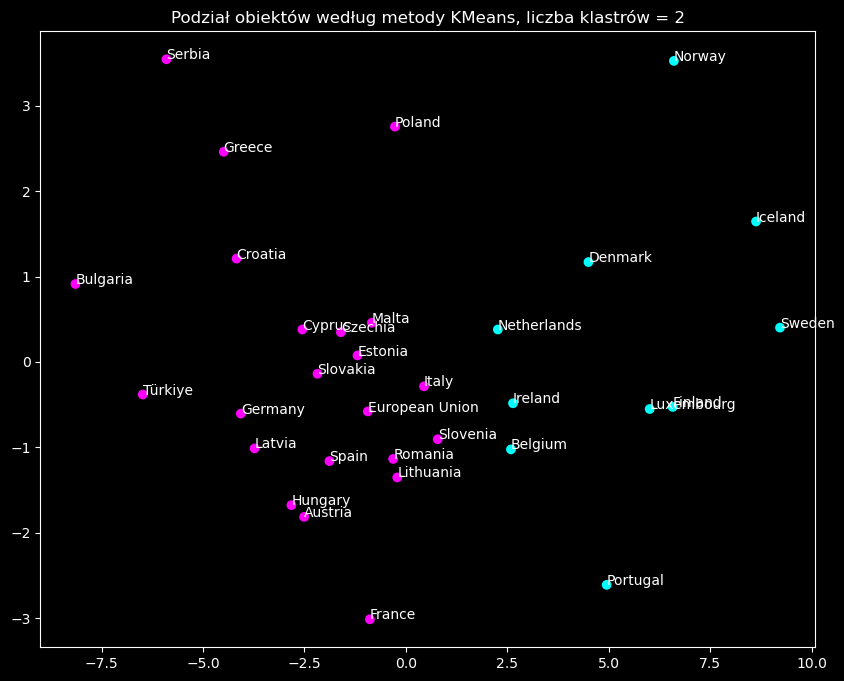

In [24]:
fit_and_show(cl.KMeans(n_clusters=2), plot=True, name='KMeans')

c:\Users\Dawid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coef: 0.33445736726461694
Calinski-Harabasz Index: 31.561392651655712
Davies-Bouldin Index: 0.9471296655329985


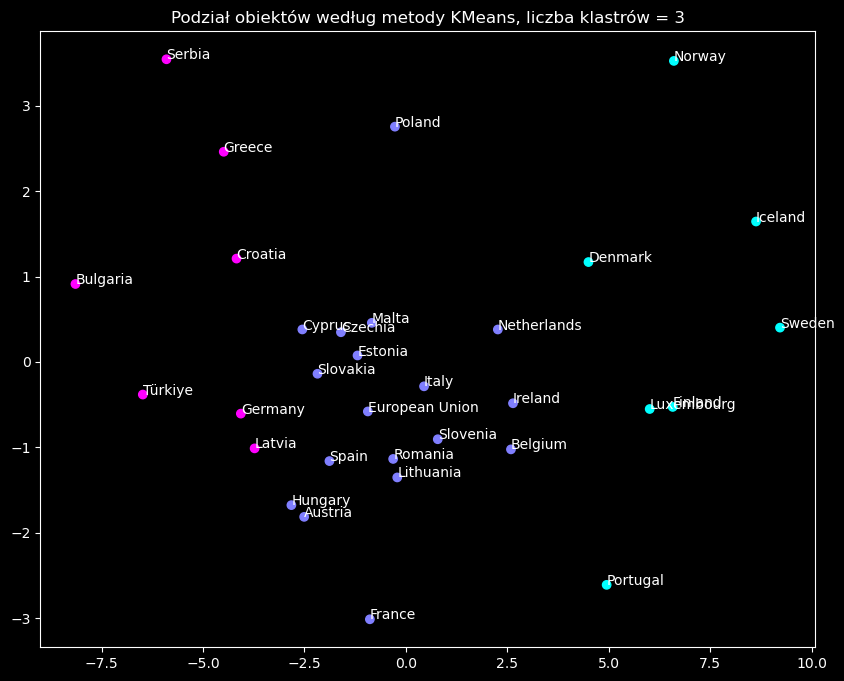

In [25]:
fit_and_show(cl.KMeans(n_clusters=3), plot=True, name='KMeans')

The resulting breakdowns suggest conclusions consistent with empirical sentiments.

For the division into two clusters:
Europe has divided into groups in its smoking habits:
- low smokers: all of Scandinavia, all Benelux countries, Portugal, Ireland and England
- more frequent smokers: the rest of the countries

For the division into three clusters (which, according to the calculated measures, is worse):
- least smoking countries: all of Scandinavia, along with Portugal, England and Luxembourg further in a separate cluster
- moderately smoking countries: central European countries and most western countries (excluding Germany)
- countries with a higher propensity to smoke: the Balkan countries, Greece, Turkey, Germany and Latvia

## Verification of the obtained divisions

In this section, we will evaluate how the values of the variables are shaped in the selected clusters.

In [26]:
m2 = cl.KMeans(n_clusters=2) # model dla dwóch klastrów
m3 = cl.KMeans(n_clusters=3) # model dla trzech klastrów
# przypisanie labeli
division_for_2 = m2.fit_predict(final_df)
division_for_3 = m3.fit_predict(final_df)

c:\Users\Dawid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Dawid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Split into two clusters

**cluster 1**

In [27]:
list(new_df[division_for_2 == 0].index)

['European Union',
 'Bulgaria',
 'Czechia',
 'Germany',
 'Estonia',
 'Greece',
 'Spain',
 'France',
 'Croatia',
 'Italy',
 'Cyprus',
 'Latvia',
 'Lithuania',
 'Hungary',
 'Malta',
 'Austria',
 'Poland',
 'Romania',
 'Slovenia',
 'Slovakia',
 'Serbia',
 'Türkiye']

In [28]:
new_df[division_for_2 == 0].describe().mean(axis=1)

count    22.000000
mean     19.056061
std       3.546998
min      13.495833
25%      16.747917
50%      18.468750
75%      20.954792
max      27.600000
dtype: float64

**cluster 2**

In [29]:
list(new_df[division_for_2 == 1].index)

['Belgium',
 'Denmark',
 'Ireland',
 'Luxembourg',
 'Netherlands',
 'Portugal',
 'Finland',
 'Sweden',
 'Iceland',
 'Norway']

In [30]:
new_df[division_for_2 == 1].describe().mean(axis=1)

count    10.000000
mean     10.226250
std       3.338985
min       5.104167
25%       8.048958
50%      10.341667
75%      12.741667
max      14.929167
dtype: float64

The cluster with the northern countries actually has almost twice the average level of smoking statistics than the cluster we identified as the countries that smoke more frequently.

### Split into three clusters

**cluster 1**

In [31]:
list(new_df[division_for_3 == 0].index)

['Denmark', 'Luxembourg', 'Portugal', 'Finland', 'Sweden', 'Iceland', 'Norway']

In [32]:
new_df[division_for_3 == 0].describe().mean(axis=1)

count     7.000000
mean      8.836905
std       2.795625
min       5.104167
25%       7.068750
50%       8.758333
75%      10.533333
max      12.791667
dtype: float64

We can see that in this cluster the average of all variables (which are related to smoking frequency) is 8.83%.

**cluster 2**

In [33]:
list(new_df[division_for_3 == 1].index)

['Bulgaria', 'Germany', 'Greece', 'Croatia', 'Latvia', 'Serbia', 'Türkiye']

In [34]:
new_df[division_for_3 == 1].describe().mean(axis=1)

count     7.000000
mean     22.269048
std       3.121663
min      18.620833
25%      20.227083
50%      21.891667
75%      23.841667
max      27.233333
dtype: float64

Indeed, in the cluster where we expected to see a higher proportion of smoking, the average of smoking-related variables is almost twice as high.

**cluster 3**

In [35]:
list(new_df[division_for_3 == 2].index)

['European Union',
 'Belgium',
 'Czechia',
 'Estonia',
 'Ireland',
 'Spain',
 'France',
 'Italy',
 'Cyprus',
 'Lithuania',
 'Hungary',
 'Malta',
 'Netherlands',
 'Austria',
 'Poland',
 'Romania',
 'Slovenia',
 'Slovakia']

In [36]:
new_df[division_for_3 == 2].describe().mean(axis=1)

count    18.000000
mean     16.875231
std       2.796520
min      11.879167
25%      15.155208
50%      17.064583
75%      18.493750
max      22.083333
dtype: float64

The cluster we suspected of having the highest propensity to smoke among citizens actually has an average variable value higher than the previous one (described as moderate).

These analyses were not intended to study the smoking phenomenon in depth in the clusters, but to verify the superficial correspondence of the behavior of the phenomena in the separated clusters. It turned out that our intuition about the divisions was as justified as possible.

# Summary

We can see that the different clustering methods used gave similar results.

For the k-means method, the Silhouette coefficient and the Calinski-Harabasz and Davies-Bouldin indices gave an unambiguous verdict - dividing the sample into 2 clusters will be the optimal solution, and all the three metrics at the same time will be at a high level. With these metrics, it was possible to conclude that these methods, will be one of the better ones to conduct the analysis.

All this indicates to us that the goal of dividing the objects (countries of Europe) into clusters was successfully achieved. Countries with a high percentage of smokers were separated from countries where the percentage of smokers does not take on such high values.

The results of our study differ from those of the literature survey. The most surprising fact is the difference in female mortality rates. In the literature study, the countries with the highest rates were largely northern European countries. In our study, these countries showed membership in a cluster of less smoking countries.

The results of the literature study for men are also not consistent with the results of our analysis. Following our study, we would expect that the highest mortality rates would be characterized by citizens of southern European countries, and these are Central European countries.

The differences are primarily due to the fact that our study and the literature survey do not strictly examine the same phenomenon. It would seem that the relationship between the phenomenon of cigarette smoking alone in the country and the mortality caused by it would be strong enough.However, it turned out that the strength of the relationship between habit and mortality is not strong enough to conclude that a country's cigarette-smoking habit unambiguously affects mortality from cigarette smoking. This may be influenced by other factors not included in the study, so the inconsistency of the results does not prove that the study is invalid.As we checked in our work, the obtained clusters are characterized by clearly different average levels of the studied variables, which allows us to conclude that the cluster analysis procedures carried out are correct.

# Bibliography

1. World Health Organization - https://www.who.int/news-room/fact-sheets/detail/tobacco
2. ,,Smoking epidemic in Europe in the 21st century", F. Janssen, Shady El Gewily, Anastasios Bardoutsos - https://pubmed.ncbi.nlm.nih.gov/32769210/
3. Wikipedia ,,Kernel density estimation" - https://en.wikipedia.org/wiki/Kernel_density_estimation
4. ,,Bootstrap Confidence Intervals and Bootstrap Approximations", T. Diciccio, R. Tibshirani - https://www.tandfonline.com/doi/abs/10.1080/01621459.1987.10478409
5. Wikipedia ,,Principal component analysis" - https://en.wikipedia.org/wiki/Principal_component_analysis
6. ,,Silhouettes: A graphical aid to the interpretation and validation of cluster analysis", Peter J. Rousseeuw - https://www.sciencedirect.com/science/article/pii/0377042787901257
7. ,,A dendrite method for cluster analysis", T. Caliński, J. Harabasz - https://www.tandfonline.com/doi/abs/10.1080/03610927408827101
8. ,,A Cluster Separation Measure", David L. Davies, Donald W. Bouldin - https://ieeexplore.ieee.org/document/4766909
